In [1]:


#Question 1:All data are int.
#           Dont have empty or null values.If have,If there is a null value,
#           I can choose to delete this row to improve the accuracy of the model, 
#           or I can replace it with a 0 value and use a small amount of dirty data to improve the model ability to resist dirty data.
#Question 2:Look this ipython


import pandas as pd
import numpy as np
train = pd.read_csv("tae.csv").sample(n=80,replace=False)


test = pd.read_csv("tae.csv").sample(n=40,replace=False)


train.describe()

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,1.775000,12.775000,7.350000,1.825000,28.350000,2.050000
std,0.420217,6.500195,6.803015,0.382364,13.640131,0.855363
min,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000
25%,2.000000,7.750000,3.000000,2.000000,18.750000,1.000000
50%,2.000000,13.000000,3.000000,2.000000,27.000000,2.000000
75%,2.000000,18.000000,11.000000,2.000000,38.000000,3.000000
max,2.000000,25.000000,25.000000,2.000000,66.000000,3.000000


In [2]:
train.shape
train['Class'].value_counts()

Class
3    31
1    27
2    22
Name: count, dtype: int64

In [3]:
x=train.iloc[:,:-1]

x.isnull().sum()

Native Speaker       0
Course instructor    0
Course               0
Semesterr            0
Class Size           0
dtype: int64

In [4]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,5]
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,5]

print('******** x  test ********')
print(x_test)
print('******** x  train ********')
print(x_train)
print('******** y  test ********')
print(y_test)
print('******** y  train ********')
print(y_train)
print('*******************************')

******** x  test ********
     Native Speaker  Course instructor  Course  Semesterr  Class Size
57                2                 13       3          1          10
119               2                 15       1          2          19
109               2                 13       1          2          29
24                2                 15      13          2          37
77                2                 14      15          2          38
55                2                  7      11          2          10
22                2                  2       9          2          31
90                1                 17      17          2          19
59                2                 25       7          2          27
50                2                 13       1          2          30
124               2                 14      15          2          36
127               2                 20       2          2          45
115               2                  8       7          2       

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
score

0.5

[2 1 1 2 2 2 1 3 2 3 2 3 1 1 3 3 1 2 3 1 2 2 2 1 3 3 3 3 3 1 3 3 3 2 2 1 1
 3 1 2]
The optimal number of neighbors is 4
The optimal score is 0.78
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0.75, 0.75, 0.725, 0.775, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]


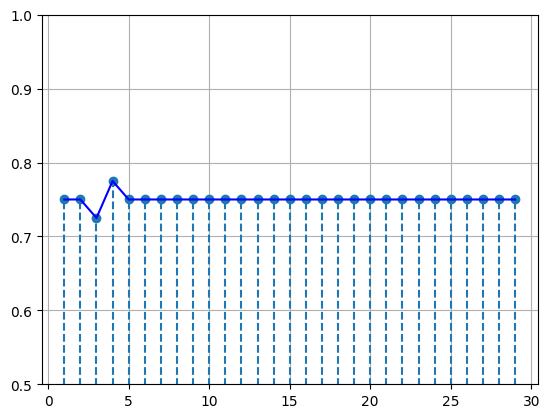

In [6]:
import matplotlib.pyplot as plt # library for plotting
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')
# line required for inline charts/plots
%matplotlib inline
# empty variable for storing the KNN metrics
scores=[]
# We try different values of k for the KNN (from k=1 up to k=20)
lrange=list(range(1,30))
# loop the KNN process
for k in lrange:
 # input the k value and 'distance' measure
 knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
 # input the train data to train KNN
 knn.fit(x_train,y_train)
 # see KNN prediction by inputting the test data
 y_pred=knn.predict(x_test)
 
 # append the performance metric (accuracy)
 scores.append(metrics.accuracy_score(y_test,y_pred))
 optimal_k = lrange[scores.index(max(scores))]
print(y_pred)
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

# plot the results
print(lrange)
print(scores)
plt.ylim(0.5,1.0)
plt.stem(lrange, scores,linefmt ='--')
plt.plot(lrange, scores,color='b')
plt.grid()
plt.show()

The prediction accuracy is: 75.00%
[[ 9  2  2]
 [ 3  9  1]
 [ 0  2 12]]


Text(0.5, 58.7222222222222, 'Predicted label')

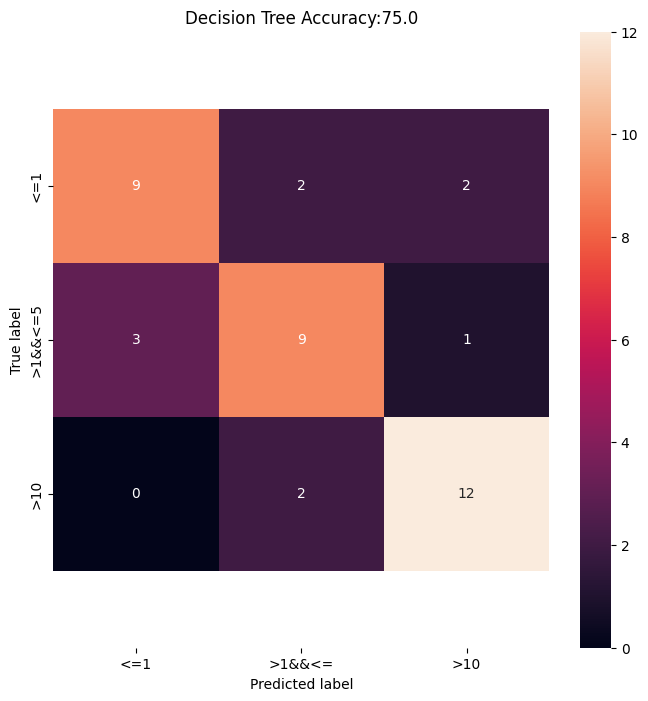

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
# predict the classes of new, unseen data
predict = knn.predict(x_test)
print("The prediction accuracy is: {0:2.2f}{1:s}".format(knn.score(x_test,y_test)*100,"%"))
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
print(cm)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['<=1','>1&&<=5','>10'],
 columns = ['<=1','>1&&<=','>10'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(knn.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

The optimal number of neighbors is 4
The optimal score is 0.50
[0.5   0.375 0.625 0.375 0.625 0.375 0.625 0.5   0.75  0.25 ]
[0.475, 0.4625, 0.4875, 0.5, 0.4625, 0.475, 0.4875, 0.4625, 0.475, 0.45, 0.4625, 0.475, 0.5, 0.4875, 0.475, 0.4625, 0.475, 0.5, 0.5]


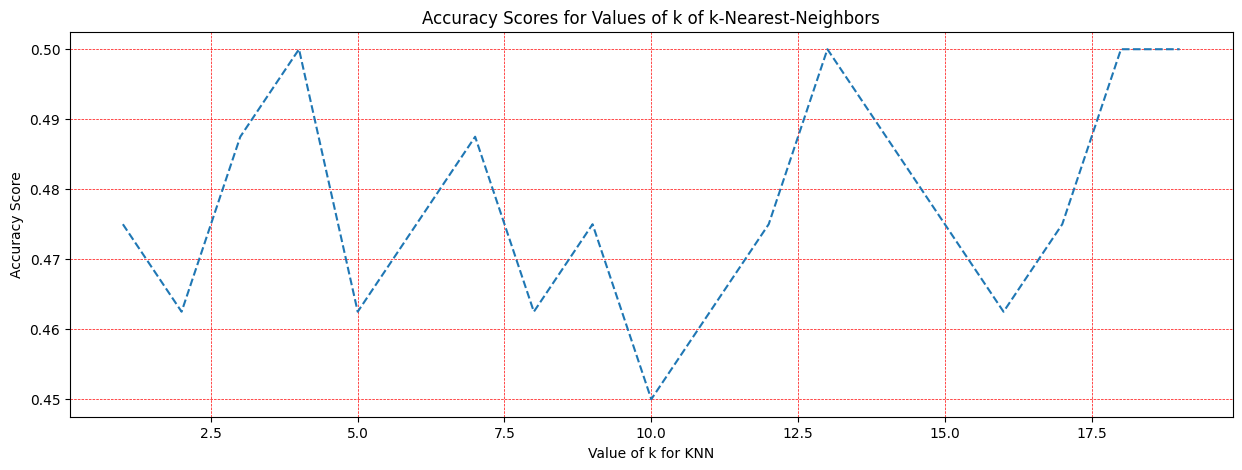

In [8]:
# import library for cross validation scoring
from sklearn.model_selection import cross_val_score
# empty variable for storing the KNN metrics
scores=[]
# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20))
# loop the KNN process
for k in lrange:
 # input the k value and 'distance' measure
 knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
 # get score for the 10 fold cross validation
 score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
 
 scores.append(score.mean())
optimal_k = lrange[scores.index(max(scores))]

print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))
plt.figure(2,figsize=(15,5))
print(score)
print(scores)
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.grid(color = 'r',linestyle = '--', linewidth = 0.5)
plt.show()